In [68]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [69]:
# Load Datasets
cwd = Path.cwd()

# EDA → Python → Scripts → Project and then down into Data/covariates
covariates_dir = cwd.parents[2] / "Data" / "covariates" / "lsoa" / "lsoa" / "era5"

### DAILY RAIN

In [70]:
daily_rain = pd.read_csv(covariates_dir / "daily_rain_lsoa.csv")
daily_rain

,LSOA21CD,dailyrain,date,rain_7day_avg,rain_cat
0,E01000001,0.001921,2021-05-01,NaN,NaN
1,E01000001,0.003889,2021-05-02,NaN,NaN
2,E01000001,0.000291,2021-05-03,NaN,NaN
3,E01000001,0.000836,2021-05-04,NaN,NaN
4,E01000001,0.001370,2021-05-05,NaN,NaN
...,...,...,...,...,...
12056793,W01002040,0.009485,2022-03-30,0.001437,4.0
12056794,W01002040,0.009150,2022-03-31,0.002743,5.0
12056795,W01002040,0.001070,2022-04-01,0.002892,5.0
12056796,W01002040,0.004102,2022-04-02,0.003463,5.0


In [71]:
daily_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12056798 entries, 0 to 12056797
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   LSOA21CD       object 
 1   dailyrain      float64
 2   date           object 
 3   rain_7day_avg  float64
 4   rain_cat       float64
dtypes: float64(3), object(2)
memory usage: 459.9+ MB


In [72]:
daily_rain.describe()

,dailyrain,rain_7day_avg,rain_cat
count,1.205612e+07,1.184211e+07,1.184211e+07
mean,1.179649e-03,1.163891e-03,2.999981e+00
std,2.108454e-03,1.071197e-03,1.414200e+00
min,0.000000e+00,1.924248e-07,1.000000e+00
25%,4.789867e-05,2.613671e-04,2.000000e+00
50%,3.177643e-04,9.176421e-04,3.000000e+00
75%,1.362995e-03,1.762484e-03,4.000000e+00
max,3.296476e-02,1.589142e-02,5.000000e+00


In [73]:
daily_rain.nunique()

LSOA21CD           35671
dailyrain        2011330
date                 338
rain_7day_avg    2037940
rain_cat               5
dtype: int64

In [74]:
daily_rain.isnull().sum()

LSOA21CD              0
dailyrain           674
date                  0
rain_7day_avg    214690
rain_cat         214690
dtype: int64

    Alot of missing data

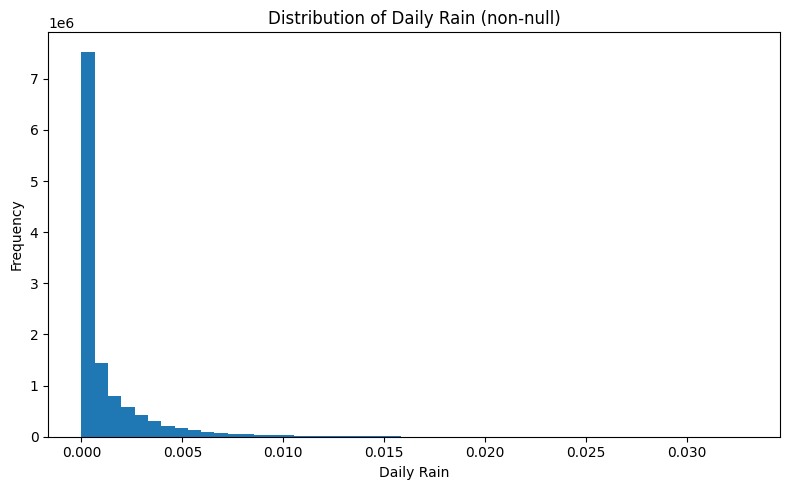

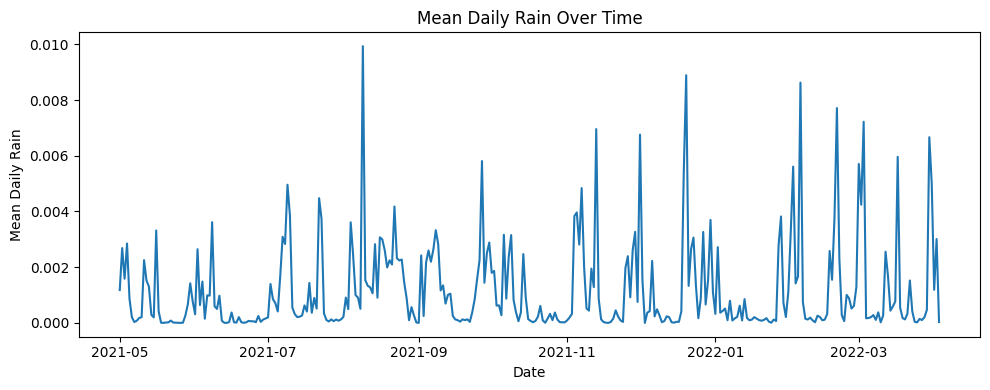

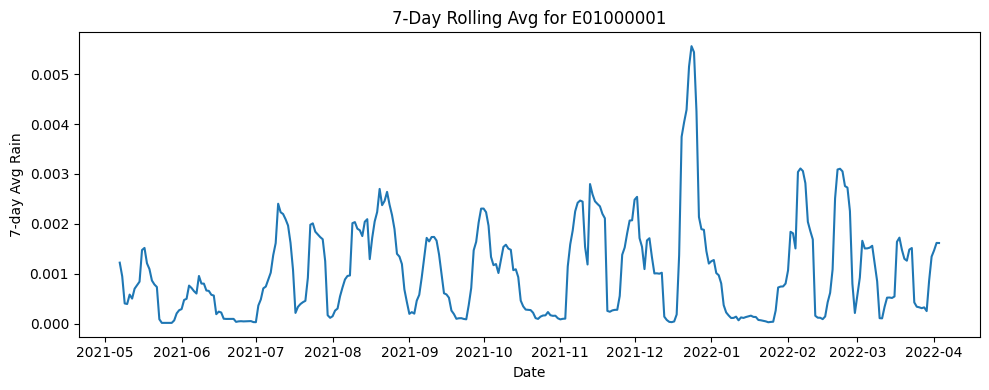

In [75]:
# parse dates
daily_rain['date'] = pd.to_datetime(daily_rain['date'])

# Histogram of daily rain (drop nulls)
plt.figure(figsize=(8,5))
plt.hist(daily_rain['dailyrain'].dropna(), bins=50)
plt.xlabel('Daily Rain')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Rain (non-null)')
plt.tight_layout()
plt.show()

# Time series of average daily rain across all LSOAs
avg_by_date = (
    daily_rain
    .groupby('date')['dailyrain']
    .mean()
)
plt.figure(figsize=(10,4))
plt.plot(avg_by_date.index, avg_by_date.values)
plt.xlabel('Date')
plt.ylabel('Mean Daily Rain')
plt.title('Mean Daily Rain Over Time')
plt.tight_layout()
plt.show()

# Inspect one LSOA’s 7-day average series (with nulls)
sample = daily_rain['LSOA21CD'].unique()[0]
sub = daily_rain[daily_rain['LSOA21CD'] == sample].set_index('date')
plt.figure(figsize=(10,4))
plt.plot(sub.index, sub['rain_7day_avg'])
plt.xlabel('Date')
plt.ylabel('7-day Avg Rain')
plt.title(f'7-Day Rolling Avg for {sample}')
plt.tight_layout()
plt.show()

### DAILY TEMP

In [76]:
daily_temp = pd.read_csv(covariates_dir / "daily_temp_lsoa.csv")
daily_temp

,LSOA21CD,dailytemp,date,temp_7day_avg,temp_cat
0,E01000001,280.943900,2021-05-01,NaN,NaN
1,E01000001,279.457500,2021-05-02,NaN,NaN
2,E01000001,281.023050,2021-05-03,NaN,NaN
3,E01000001,280.151300,2021-05-04,NaN,NaN
4,E01000001,278.374350,2021-05-05,NaN,NaN
...,...,...,...,...,...
12056793,W01002040,287.104900,2022-03-30,288.764357,4.0
12056794,W01002040,286.090700,2022-03-31,288.521529,4.0
12056795,W01002040,284.914500,2022-04-01,288.080457,4.0
12056796,W01002040,287.725500,2022-04-02,287.852300,4.0


In [77]:
daily_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12056798 entries, 0 to 12056797
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   LSOA21CD       object 
 1   dailytemp      float64
 2   date           object 
 3   temp_7day_avg  float64
 4   temp_cat       float64
dtypes: float64(3), object(2)
memory usage: 459.9+ MB


In [78]:
daily_temp.describe()

,dailytemp,temp_7day_avg,temp_cat
count,1.205612e+07,1.184211e+07,1.184211e+07
mean,2.841878e+02,2.842386e+02,2.999994e+00
std,4.870320e+00,4.411018e+00,1.414218e+00
min,2.690969e+02,2.733074e+02,1.000000e+00
25%,2.804871e+02,2.808815e+02,2.000000e+00
50%,2.840890e+02,2.838709e+02,3.000000e+00
75%,2.884340e+02,2.882896e+02,4.000000e+00
max,2.965628e+02,2.956559e+02,5.000000e+00


In [79]:
daily_temp.isnull().sum()

LSOA21CD              0
dailytemp           674
date                  0
temp_7day_avg    214690
temp_cat         214690
dtype: int64

    Also lots of missingness 

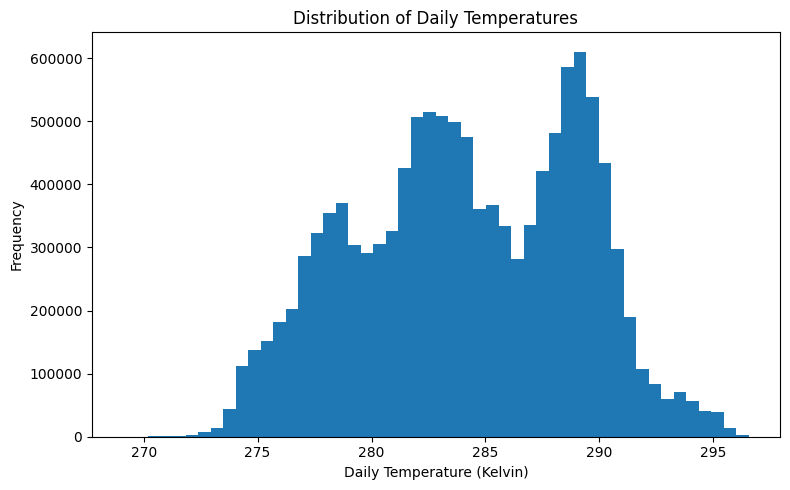

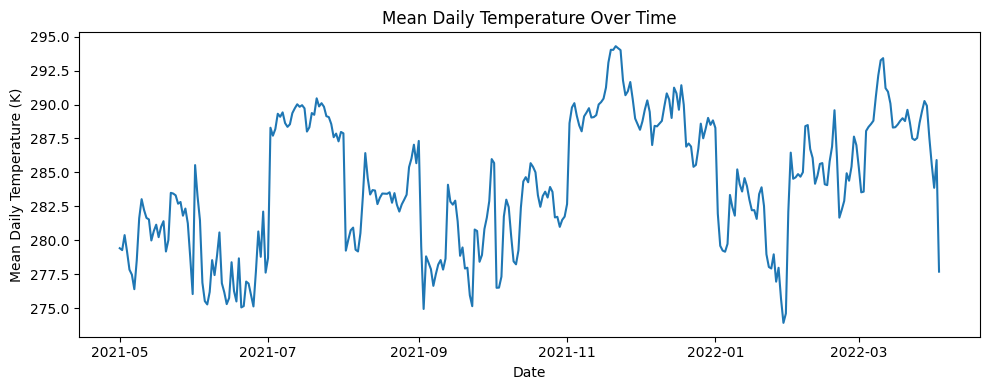

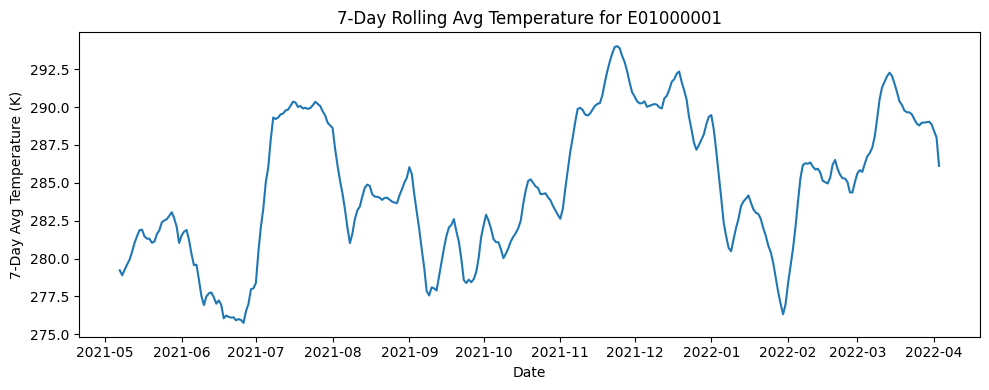

In [80]:
# Parse the dates
daily_temp['date'] = pd.to_datetime(daily_temp['date'])

# Histogram of daily temperatures (drop NaNs)
plt.figure(figsize=(8, 5))
plt.hist(daily_temp['dailytemp'].dropna(), bins=50)
plt.xlabel('Daily Temperature (Kelvin)')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Temperatures')
plt.tight_layout()
plt.show()

# Time series of mean daily temperature over all LSOAs
avg_temp_by_date = (
    daily_temp
    .groupby('date')['dailytemp']
    .mean()
)
plt.figure(figsize=(10, 4))
plt.plot(avg_temp_by_date.index, avg_temp_by_date.values)
plt.xlabel('Date')
plt.ylabel('Mean Daily Temperature (K)')
plt.title('Mean Daily Temperature Over Time')
plt.tight_layout()
plt.show()

# Example 7-day rolling average for a single LSOA
sample_lsoa = daily_temp['LSOA21CD'].iloc[0]
sub = daily_temp[daily_temp['LSOA21CD'] == sample_lsoa].set_index('date')
plt.figure(figsize=(10, 4))
plt.plot(sub.index, sub['temp_7day_avg'])
plt.xlabel('Date')
plt.ylabel('7-Day Avg Temperature (K)')
plt.title(f'7-Day Rolling Avg Temperature for {sample_lsoa}')
plt.tight_layout()
plt.show()


### Comparision of Rain vs Temp

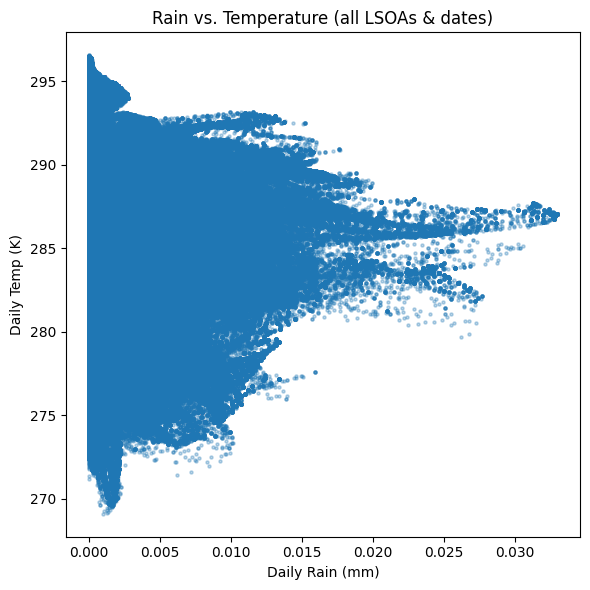

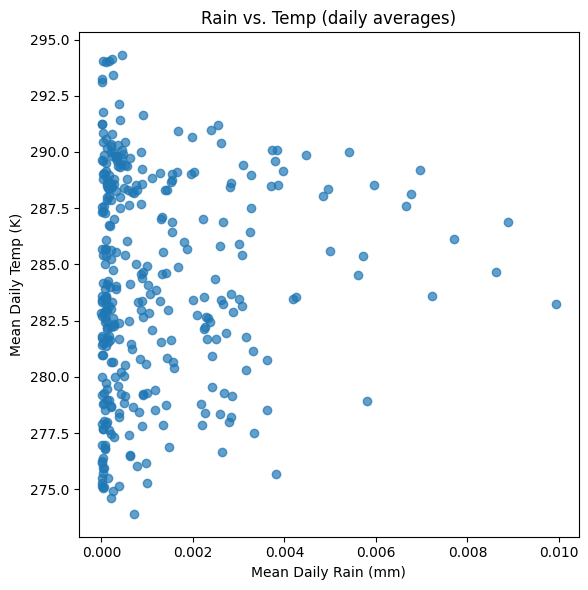

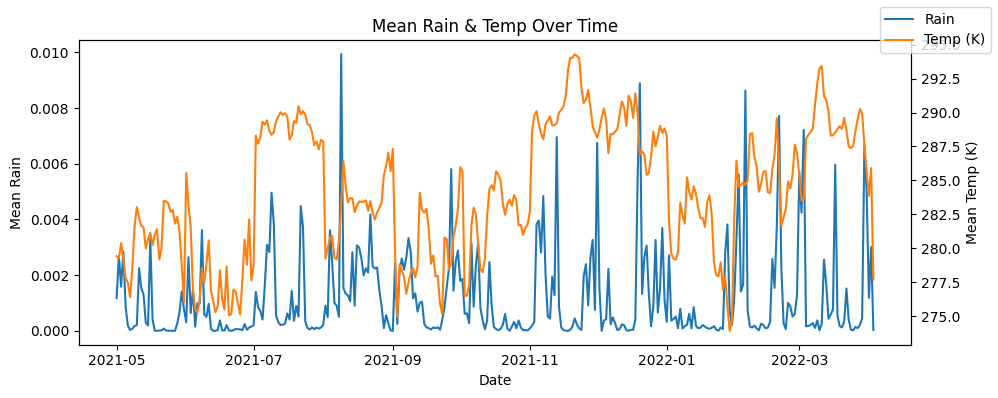

Pearson r = 0.052, p‐value = 0.000e+00


In [81]:
# Merge rain & temp on LSOA and date
df = pd.merge(
    daily_rain[['LSOA21CD','date','dailyrain']],
    daily_temp[['LSOA21CD','date','dailytemp']],
    on=['LSOA21CD','date'],
    how='inner'
).dropna()

# Scatter plot of all (rain, temp) pairs
plt.figure(figsize=(6,6))
plt.scatter(df['dailyrain'], df['dailytemp'], alpha=0.3, s=5)
plt.xlabel('Daily Rain (mm)')
plt.ylabel('Daily Temp (K)')
plt.title('Rain vs. Temperature (all LSOAs & dates)')
plt.tight_layout()
plt.show()

# Aggregate by date: mean rain vs mean temp
agg = df.groupby('date').agg({'dailyrain':'mean','dailytemp':'mean'})
plt.figure(figsize=(6,6))
plt.scatter(agg['dailyrain'], agg['dailytemp'], alpha=0.7)
plt.xlabel('Mean Daily Rain (mm)')
plt.ylabel('Mean Daily Temp (K)')
plt.title('Rain vs. Temp (daily averages)')
plt.tight_layout()
plt.show()

# Time‐series on shared x-axis (dual‐axis)
fig, ax1 = plt.subplots(figsize=(10,4))
ax1.plot(agg.index, agg['dailyrain'], label='Rain')
ax1.set_ylabel('Mean Rain')
ax2 = ax1.twinx()
ax2.plot(agg.index, agg['dailytemp'], color='tab:orange', label='Temp (K)')
ax2.set_ylabel('Mean Temp (K)')
ax1.set_xlabel('Date')
ax1.set_title('Mean Rain & Temp Over Time')
fig.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Compute overall Pearson r
r, p = pearsonr(df['dailyrain'], df['dailytemp'])
print(f'Pearson r = {r:.3f}, p‐value = {p:.3e}')


    No correlation between features

### LSOA Mobility (Raw)

In [82]:
# EDA → Python → Scripts → Project and then down into Data/covariates
era5_lsoa_raw = cwd.parents[2] / "Data" / "covariates" / "lsoa" / "lsoa" 

In [83]:
lsoa_mob_raw = pd.read_csv(era5_lsoa_raw / "lsoa_mob_raw.csv")
lsoa_mob_raw

,LSOA21CD,date,mobility
0,E01000001,2021-05-01,-24.036334
1,E01000001,2021-05-02,-20.190521
2,E01000001,2021-05-03,-83.884360
3,E01000001,2021-05-04,-63.884360
4,E01000001,2021-05-05,-61.961453
...,...,...,...
12458972,E01034178,2022-04-26,-38.000000
12458973,E01034178,2022-04-27,-35.000000
12458974,E01034178,2022-04-28,-38.000000
12458975,E01034178,2022-04-29,-38.000000


In [84]:
lsoa_mob_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12458977 entries, 0 to 12458976
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   LSOA21CD  object 
 1   date      object 
 2   mobility  float64
dtypes: float64(1), object(2)
memory usage: 285.2+ MB


In [85]:
lsoa_mob_raw.describe()

,mobility
count,1.245898e+07
mean,-2.645393e+01
std,1.651497e+01
min,-8.800000e+01
25%,-3.600000e+01
50%,-2.700000e+01
75%,-1.400000e+01
max,5.300000e+01


In [87]:
lsoa_mob_raw.isnull().sum()

LSOA21CD    0
date        0
mobility    0
dtype: int64

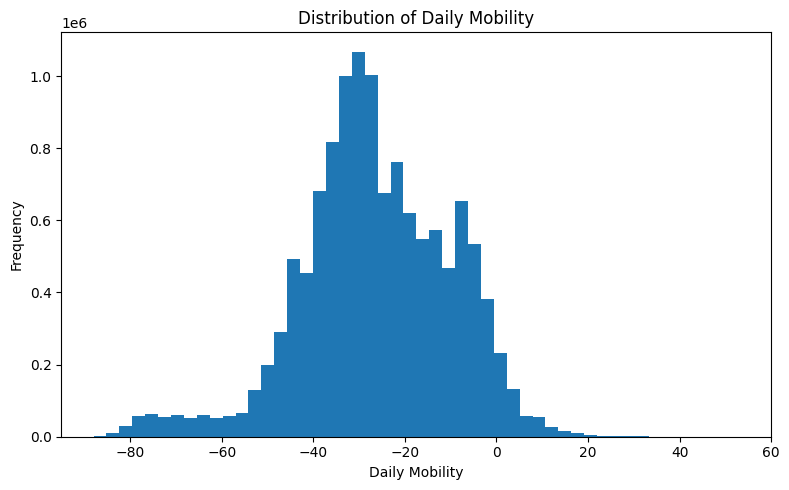

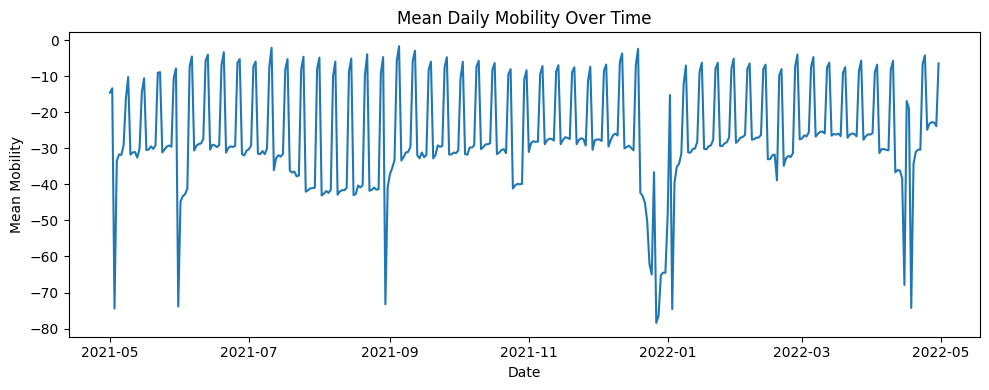

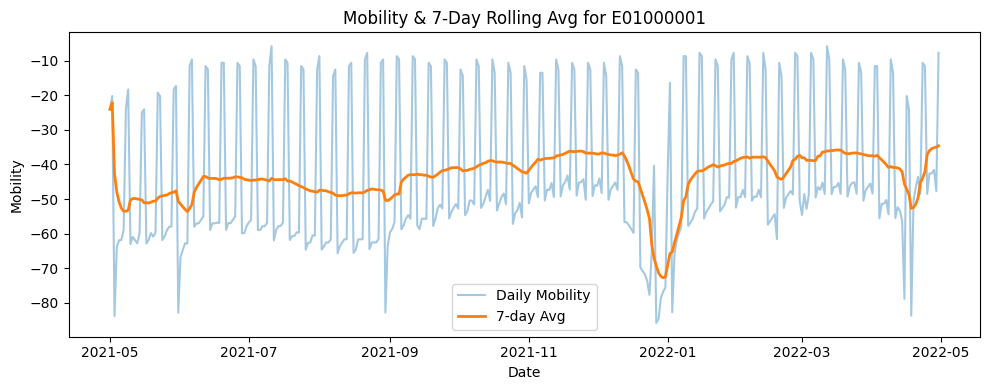

In [89]:
# Parse dates
lsoa_mob_raw['date'] = pd.to_datetime(lsoa_mob_raw['date'])

# Histogram of mobility values
plt.figure(figsize=(8,5))
plt.hist(lsoa_mob_raw['mobility'], bins=50)
plt.xlabel('Daily Mobility')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Mobility')
plt.tight_layout()
plt.show()

# Time series of mean mobility across all LSOAs
mean_mob_by_date = lsoa_mob_raw.groupby('date')['mobility'].mean()
plt.figure(figsize=(10,4))
plt.plot(mean_mob_by_date.index, mean_mob_by_date.values)
plt.xlabel('Date')
plt.ylabel('Mean Mobility')
plt.title('Mean Daily Mobility Over Time')
plt.tight_layout()
plt.show()

# Compute and plot a 7-day rolling average for a sample LSOA
sample = lsoa_mob_raw['LSOA21CD'].iloc[0]
sub = (
    lsoa_mob_raw[lsoa_mob_raw['LSOA21CD'] == sample]
    .set_index('date')
    .sort_index()
)
sub['mob_7day_avg'] = sub['mobility'].rolling(7, min_periods=1).mean()

plt.figure(figsize=(10,4))
plt.plot(sub.index, sub['mobility'], label='Daily Mobility', alpha=0.4)
plt.plot(sub.index, sub['mob_7day_avg'], label='7-day Avg', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Mobility')
plt.title(f'Mobility & 7-Day Rolling Avg for {sample}')
plt.legend()
plt.tight_layout()
plt.show()
